# Load Libs

In [2]:
### Load Python Lib##### 
########
import numpy as np
from math import *
import matplotlib.pyplot as plt
from random import gauss, randint
from matplotlib import rc
from matplotlib.ticker import FixedLocator, MultipleLocator, FormatStrFormatter

#very import to enable this so the plots can be showed in the page
get_ipython().magic(u'matplotlib inline')

# Use LaTeX font.
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':20})

# Load Data

In [3]:
### Loading the theoretical calculations
filename = 'aut_clas.txt'
lines = open(filename,'r').readlines()

N = len(lines)
W = np.zeros(N, dtype=float)
Q2 = np.zeros(N, dtype=float)
tp = np.zeros(N, dtype=float)
t = np.zeros(N, dtype=float)
asy = np.zeros(N, dtype=float)     ## A_UT(sin(phi-phi_S))
asysfi = np.zeros(N, dtype=float)  ## A_UT(sin(phi_S))
asy2fi = np.zeros(N, dtype=float)  ## A_UT(sin(2phi-phi_S))
asyfpfs = np.zeros(N, dtype=float) ## A_UT(sin(phi+phi_S))
asy3f = np.zeros(N, dtype=float)   ## A_UT(sin(3phi-phi_S))

## Read-In 
for i in range(0, N-19):
    values=lines[i+19].split()
    values = np.array(values,dtype=float)
    W[i]=(values[0])
    Q2[i]=(values[1])
    tp[i]=(values[2])
    t[i]=(values[3])
    asy[i]=(values[4])
    asysfi[i]=(values[5])
    asy2fi[i]=(values[6])
    asyfpfs[i]=(values[7])
    asy3f[i]=(values[8])

# Plotting

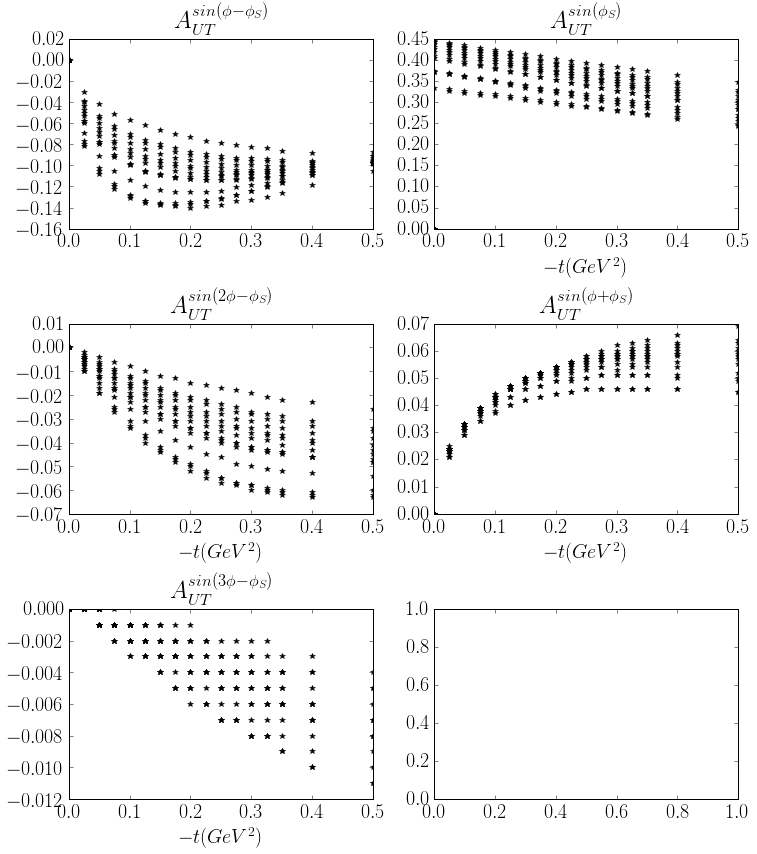

In [7]:
## Plot GEn##########{{{
f1, ax = plt.subplots(3, 2, sharex=False, figsize=(12,12))
f1.subplots_adjust(bottom=0.08, top=0.96, hspace=0.5)
#plt.grid()

#######  Subplot for GErat
axis=ax[0,0]
axis.plot(tp, asy, '*', color='black',  label='$A_{UT}^{sin(\phi-\phi_{S})}$')
axis.set_title('$A_{UT}^{sin(\phi-\phi_{S})}$')
#axis.set_xlabel('-t (GeV^2)')

axis=ax[0,1]
axis.plot(tp, asysfi, '*', color='black',  label='$A_{UT}^{sin(\phi_{S})}$')
axis.set_title('$A_{UT}^{sin(\phi_{S})}$')
axis.set_xlabel('$-t (GeV^2)$')

axis=ax[1,0]
axis.plot(tp, asy2fi, '*', color='black',  label='$A_{UT}^{sin(2\phi-\phi_{S})}$')
axis.set_title('$A_{UT}^{sin(2\phi-\phi_{S})}$')
axis.set_xlabel('$-t (GeV^2)$')

axis=ax[1,1]
axis.plot(tp, asyfpfs, '*', color='black',  label='$A_{UT}^{sin(\phi+\phi_{S})}$')
axis.set_title('$A_{UT}^{sin(\phi+\phi_{S})}$')
axis.set_xlabel('$-t (GeV^2)$')

axis=ax[2,0]
axis.plot(tp, asy3f, '*', color='black',  label='$A_{UT}^{sin(3\phi-\phi_{S})}$')
axis.set_title('$A_{UT}^{sin(3\phi-\phi_{S})}$')
axis.set_xlabel('$-t (GeV^2)$')


plotname='dvmp_asy_t_all.pdf'
plt.savefig(plotname,bbox_inches='tight')

## Save into ROOT

In [5]:
## ROOT
from rootpy.tree import Tree, TreeModel, FloatCol, IntCol
from rootpy.io import root_open

class Event(TreeModel):
    W = FloatCol() 
    Q2 = FloatCol() 
    tp = FloatCol() 
    t = FloatCol() 
    asy = FloatCol() 
    asysfi = FloatCol() 
    asy2fi = FloatCol() 
    asyfpfs = FloatCol() 
    asy3f = FloatCol() 
   

file = root_open("asy_theory.root",'recreate')
T = Tree("T", model=Event)

for i in range(0,N-19):
    T.W = W[i]
    T.Q2 = Q2[i]
    T.tp = tp[i]
    T.t = W[i]
    T.asy = asy[i]
    T.asysfi = asysfi[i]
    T.asy2fi = asy2fi[i]
    T.asyfpfs = asyfpfs[i]
    T.asy3f = asy3f[i]
    T.fill()

T.Write()
file.Close()

True